In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import statsmodels.api as sm

from sklearn.preprocessing import MinMaxScaler

import pickle 
from os import path

from sklearn import metrics
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

from keras.models import Sequential
from keras.layers import Dense
from scikeras.wrappers import KerasRegressor

In [2]:
data = pd.read_csv('dataset/train.csv')
stores = pd.read_csv('dataset/stores.csv')
features = pd.read_csv('dataset/features.csv')

In [3]:
data.shape
stores.shape
features.shape

(8190, 12)

In [4]:
data.shape

(421570, 5)

In [5]:
data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [7]:
stores.shape

(45, 3)

In [8]:
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [9]:
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


In [10]:
features.shape

(8190, 12)

In [11]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [12]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


## Handling missing values of features

In [13]:
features = features.assign(
    CPI=features["CPI"].fillna(features["CPI"].median()),
    Unemployment=features["Unemployment"].fillna(features["Unemployment"].median())
)


In [14]:
for i in range(1, 6):
    markdown_col = "MarkDown" + str(i)
    # Apply the lambda function and fill NaN values
    features[markdown_col] = features[markdown_col].apply(lambda x: 0 if x < 0 else x).fillna(0)


In [15]:

features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     8190 non-null   float64
 5   MarkDown2     8190 non-null   float64
 6   MarkDown3     8190 non-null   float64
 7   MarkDown4     8190 non-null   float64
 8   MarkDown5     8190 non-null   float64
 9   CPI           8190 non-null   float64
 10  Unemployment  8190 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


## Merge Dataset

In [16]:
data = pd.merge(data,stores,on='Store',how='left')

In [17]:
data = pd.merge(data,features,on=['Store','Date'],how='left')

In [18]:
data['Date'] = pd.to_datetime(data['Date'])

In [19]:
data.sort_values(by=['Date'],inplace=True)

In [20]:
data.set_index(data.Date, inplace=True)

In [21]:
data['IsHoliday_x'].isin(data['IsHoliday_y']).all()

True

In [22]:
data.drop(columns='IsHoliday_x',inplace=True)
data.rename(columns={"IsHoliday_y" : "IsHoliday"}, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 421570 entries, 2010-02-05 to 2012-10-26
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   Type          421570 non-null  object        
 5   Size          421570 non-null  int64         
 6   Temperature   421570 non-null  float64       
 7   Fuel_Price    421570 non-null  float64       
 8   MarkDown1     421570 non-null  float64       
 9   MarkDown2     421570 non-null  float64       
 10  MarkDown3     421570 non-null  float64       
 11  MarkDown4     421570 non-null  float64       
 12  MarkDown5     421570 non-null  float64       
 13  CPI           421570 non-null  float64       
 14  Unemployment  421570 non-null  float64       
 15  I

In [23]:
data.head()

,Store,Dept,Date,Weekly_Sales,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
Date,,,,,,,,,,,,,,,,
2010-02-05,1,1,2010-02-05,24924.50,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False
2010-02-05,29,5,2010-02-05,15552.08,B,93638,24.36,2.788,0.0,0.0,0.0,0.0,0.0,131.527903,10.064,False
2010-02-05,29,6,2010-02-05,3200.22,B,93638,24.36,2.788,0.0,0.0,0.0,0.0,0.0,131.527903,10.064,False
2010-02-05,29,7,2010-02-05,10820.05,B,93638,24.36,2.788,0.0,0.0,0.0,0.0,0.0,131.527903,10.064,False
2010-02-05,29,8,2010-02-05,20055.64,B,93638,24.36,2.788,0.0,0.0,0.0,0.0,0.0,131.527903,10.064,False


## Splitting Date Column

In [24]:
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Week'] = data['Date'].dt.isocalendar().week

In [25]:
data.head()

,Store,Dept,Date,Weekly_Sales,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Year,Month,Week
Date,,,,,,,,,,,,,,,,,,,
2010-02-05,1,1,2010-02-05,24924.50,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,2010,2,5
2010-02-05,29,5,2010-02-05,15552.08,B,93638,24.36,2.788,0.0,0.0,0.0,0.0,0.0,131.527903,10.064,False,2010,2,5
2010-02-05,29,6,2010-02-05,3200.22,B,93638,24.36,2.788,0.0,0.0,0.0,0.0,0.0,131.527903,10.064,False,2010,2,5
2010-02-05,29,7,2010-02-05,10820.05,B,93638,24.36,2.788,0.0,0.0,0.0,0.0,0.0,131.527903,10.064,False,2010,2,5
2010-02-05,29,8,2010-02-05,20055.64,B,93638,24.36,2.788,0.0,0.0,0.0,0.0,0.0,131.527903,10.064,False,2010,2,5


## Detection and Abnormalities

In [26]:
agg_data = data.groupby(['Store', 'Dept']).Weekly_Sales.agg(['max', 'min', 'mean', 'median', 'std']).reset_index()
agg_data.isnull().sum()

Store      0
Dept       0
max        0
min        0
mean       0
median     0
std       37
dtype: int64

In [27]:
store_data = pd.merge(left=data,right=agg_data,on=['Store', 'Dept'],how ='left')
store_data.dropna(inplace=True)
data = store_data.copy()
del store_data

In [28]:
data['Date'] = pd.to_datetime(data['Date'])
data.sort_values(by=['Date'],inplace=True)
data.set_index(data.Date, inplace=True)
data.head()

,Store,Dept,Date,Weekly_Sales,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,...,Unemployment,IsHoliday,Year,Month,Week,max,min,mean,median,std
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-05,1,1,2010-02-05,24924.50,A,151315,42.31,2.572,0.0,0.0,...,8.106,False,2010,2,5,57592.12,14537.37,22513.322937,18535.48,9854.349032
2010-02-05,9,97,2010-02-05,668.48,B,125833,38.01,2.572,0.0,0.0,...,6.415,False,2010,2,5,766.93,-9.92,372.655556,371.05,290.954675
2010-02-05,9,85,2010-02-05,693.87,B,125833,38.01,2.572,0.0,0.0,...,6.415,False,2010,2,5,2512.14,110.56,876.629441,824.04,307.436056
2010-02-05,8,80,2010-02-05,8654.60,A,155078,34.14,2.572,0.0,0.0,...,6.299,False,2010,2,5,11990.43,7414.43,9188.915105,9161.97,756.223236
2010-02-05,9,55,2010-02-05,11123.56,B,125833,38.01,2.572,0.0,0.0,...,6.415,False,2010,2,5,29166.26,4791.74,8607.050490,7571.60,3874.176095


In [29]:
data['Total_MarkDown'] = data['MarkDown1']+data['MarkDown2']+data['MarkDown3']+data['MarkDown4']+data['MarkDown5']
data.drop(['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'], axis = 1,inplace=True)
     

In [30]:
numeric_col = ['Weekly_Sales','Size','Temperature','Fuel_Price','CPI','Unemployment','Total_MarkDown']
data_numeric = data[numeric_col].copy()


In [31]:
data.shape

(421533, 20)

In [32]:
data = data[(np.abs(stats.zscore(data_numeric)) < 2.5).all(axis = 1)]
data.shape

(375438, 20)

## Negative weekly sales

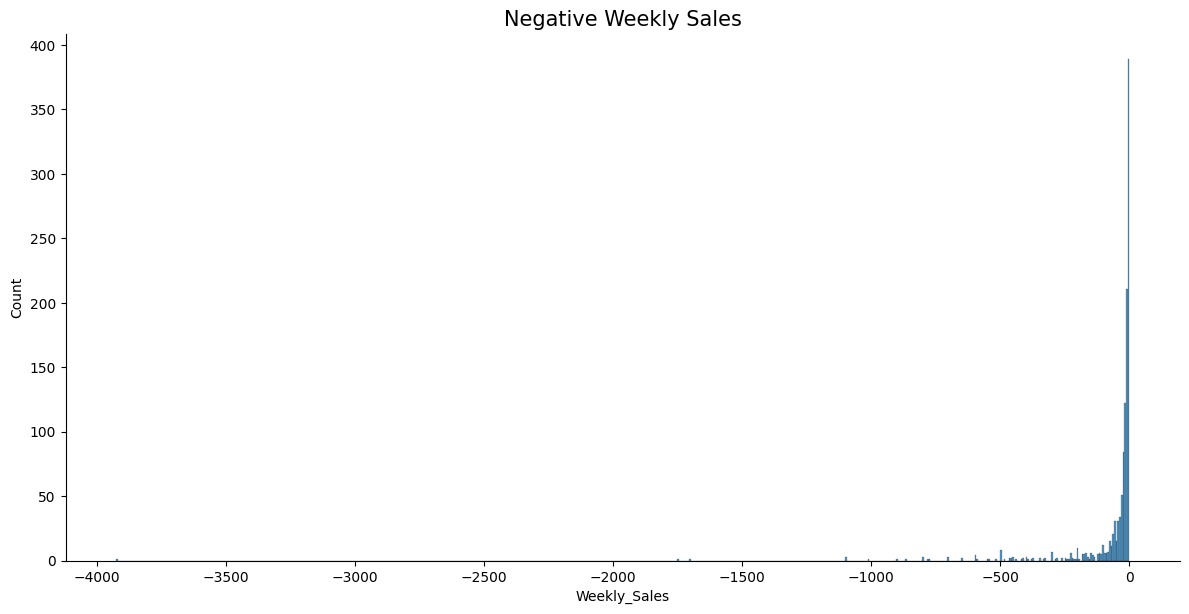

In [33]:
y = data["Weekly_Sales"][data.Weekly_Sales < 0]
sns.displot(y,height=6,aspect=2)
plt.title("Negative Weekly Sales", fontsize=15)
plt.show()

In [34]:
data=data[data['Weekly_Sales']>=0]

In [35]:
data.shape

(374247, 20)

In [36]:
data.loc[:, 'IsHoliday'] = data['IsHoliday'].astype('int')

/var/folders/f2/2d3zz0mn7tq9m6hwtlvr17500000gn/T/ipykernel_36082/4237068958.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0 0 0 ... 0 0 0]' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  data.loc[:, 'IsHoliday'] = data['IsHoliday'].astype('int')


## Preprocessed_dataset

In [37]:
data

,Store,Dept,Date,Weekly_Sales,Type,Size,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Year,Month,Week,max,min,mean,median,std,Total_MarkDown
Date,,,,,,,,,,,,,,,,,,,,
2010-02-05,1,1,2010-02-05,24924.50,A,151315,42.31,2.572,211.096358,8.106,0,2010,2,5,57592.12,14537.37,22513.322937,18535.480,9854.349032,0.00
2010-02-05,9,97,2010-02-05,668.48,B,125833,38.01,2.572,214.655459,6.415,0,2010,2,5,766.93,-9.92,372.655556,371.050,290.954675,0.00
2010-02-05,9,85,2010-02-05,693.87,B,125833,38.01,2.572,214.655459,6.415,0,2010,2,5,2512.14,110.56,876.629441,824.040,307.436056,0.00
2010-02-05,8,80,2010-02-05,8654.60,A,155078,34.14,2.572,214.471451,6.299,0,2010,2,5,11990.43,7414.43,9188.915105,9161.970,756.223236,0.00
2010-02-05,9,55,2010-02-05,11123.56,B,125833,38.01,2.572,214.655459,6.415,0,2010,2,5,29166.26,4791.74,8607.050490,7571.600,3874.176095,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-10-26,2,26,2012-10-26,9258.88,A,202307,69.79,3.506,223.078337,6.170,0,2012,10,43,19679.04,4179.99,9347.725105,8762.990,2825.107609,9678.80
2012-10-26,38,23,2012-10-26,53.12,C,39690,65.95,4.301,131.193097,10.199,0,2012,10,43,289.78,3.50,37.848679,31.365,34.065601,502.88
2012-10-26,27,6,2012-10-26,5339.65,A,204184,58.99,4.071,142.762411,8.000,0,2012,10,43,41005.33,2524.01,7730.729091,6798.780,5178.928257,10969.27


# Data visuallization

### Avearage Monthly sales


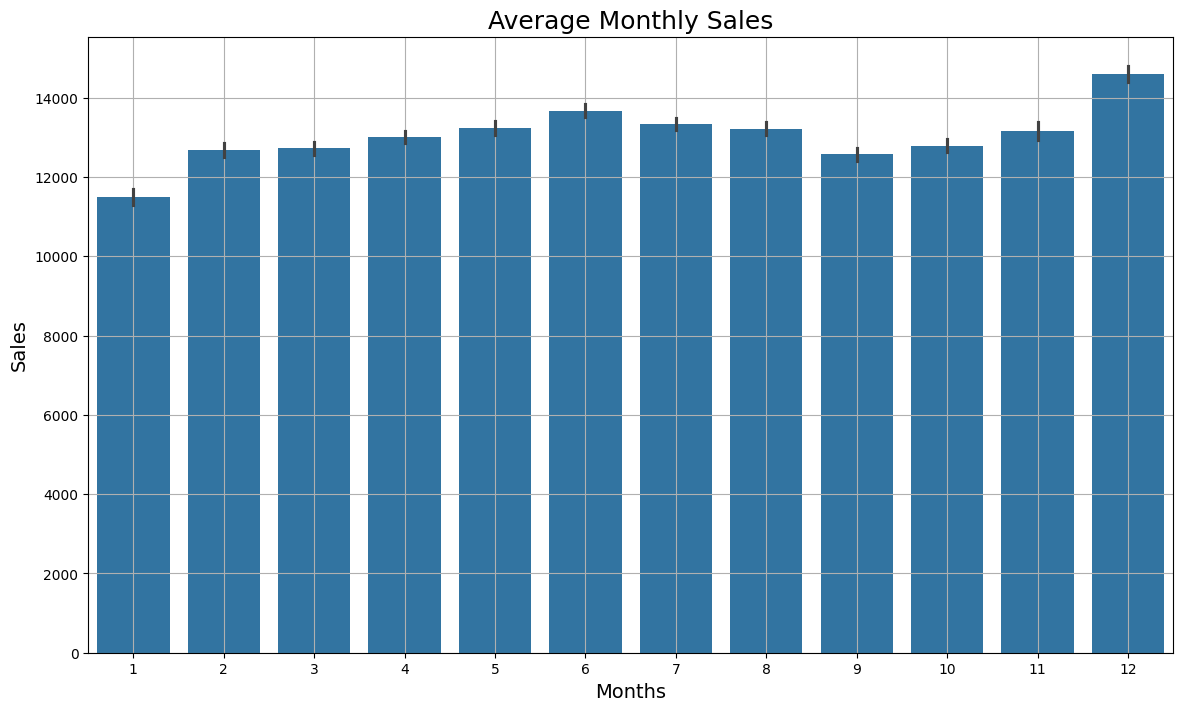

In [38]:
plt.figure(figsize=(14,8))
sns.barplot(x='Month', y='Weekly_Sales', data=data)
plt.ylabel('Sales', fontsize=14)
plt.xlabel('Months', fontsize=14)
plt.title('Average Monthly Sales', fontsize=18)
plt.grid()

# Monthly Sales for Each Year

In [39]:
data_monthly = pd.crosstab(data["Year"], data["Month"], values=data["Weekly_Sales"],aggfunc='sum')
data_monthly

Month,1,2,3,4,5,6,7,8,9,10,11,12
Year,,,,,,,,,,,,
2010,NaN,1.365986e+08,1.369976e+08,1.753251e+08,1.422677e+08,1.455770e+08,1.776954e+08,1.426176e+08,1.344151e+08,1.687452e+08,1.440445e+08,1.927286e+08
2011,1.170809e+08,1.320987e+08,1.341586e+08,1.710181e+08,1.382097e+08,1.441182e+08,1.762046e+08,1.398143e+08,1.668033e+08,1.375280e+08,1.034907e+08,1.597524e+08
2012,1.172222e+08,8.915290e+07,1.734250e+08,1.479222e+08,1.512280e+08,1.902330e+08,1.458221e+08,1.636039e+08,1.432228e+08,1.480537e+08,NaN,NaN


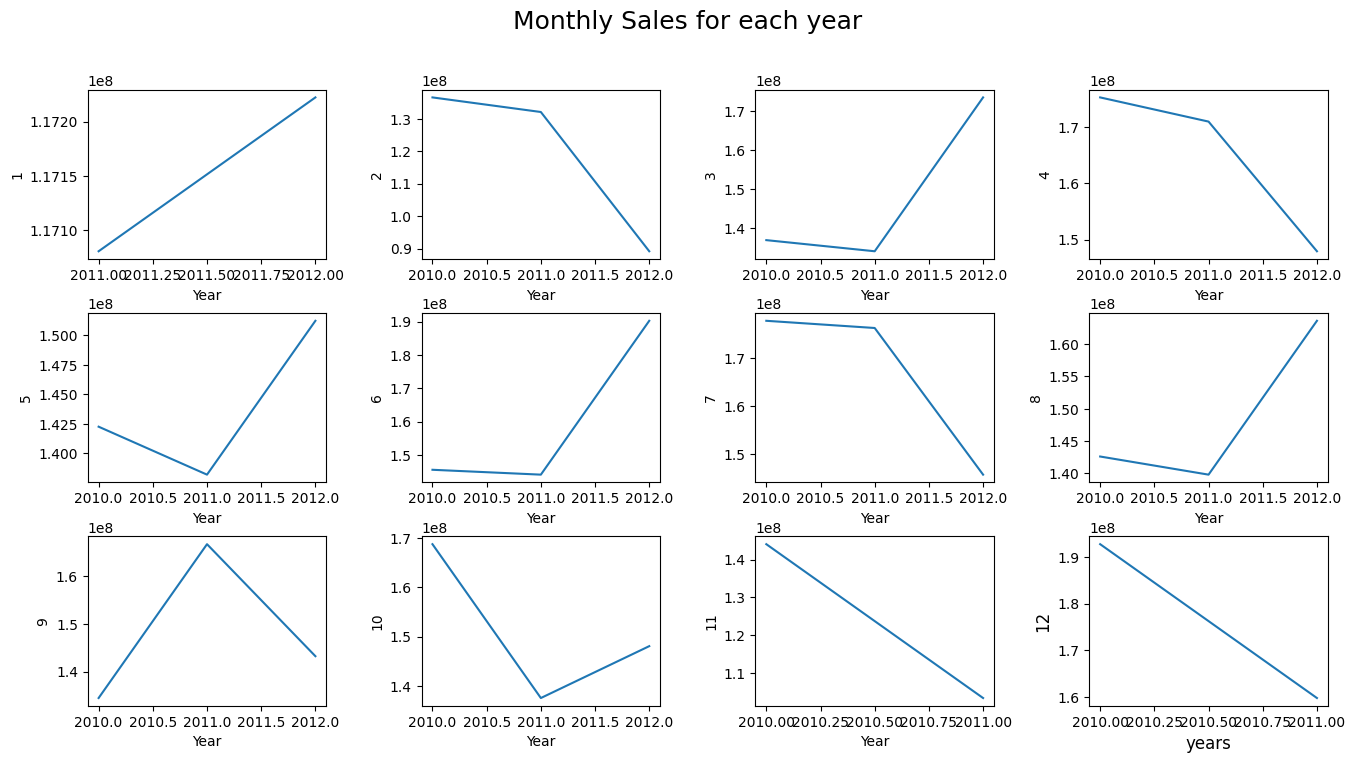

In [40]:
fig, axes = plt.subplots(3,4,figsize=(16,8))
plt.suptitle('Monthly Sales for each year', fontsize=18)
k=1
for i in range(3):
    for j in range(4):
        sns.lineplot(ax=axes[i,j],data = data_monthly[k])
        plt.subplots_adjust(wspace=0.4, hspace=0.32)
        plt.ylabel(k,fontsize=12)
        plt.xlabel('years', fontsize=12)
        k+=1

# Average Weekly Sales Store wise

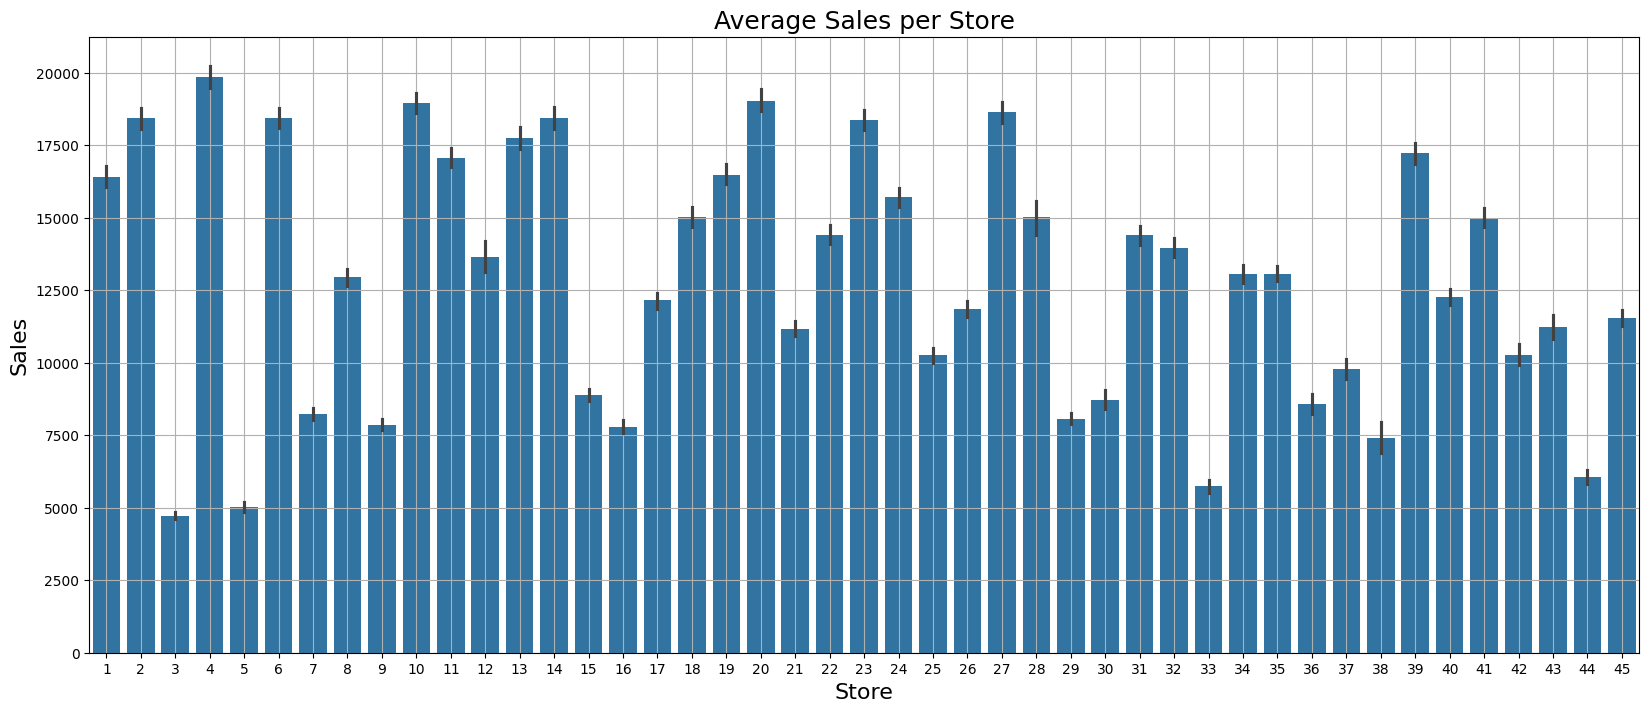

In [41]:
plt.figure(figsize=(20,8))
sns.barplot(x='Store',y='Weekly_Sales',data=data)
plt.grid()
plt.title('Average Sales per Store', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Store', fontsize=16)
plt.show()

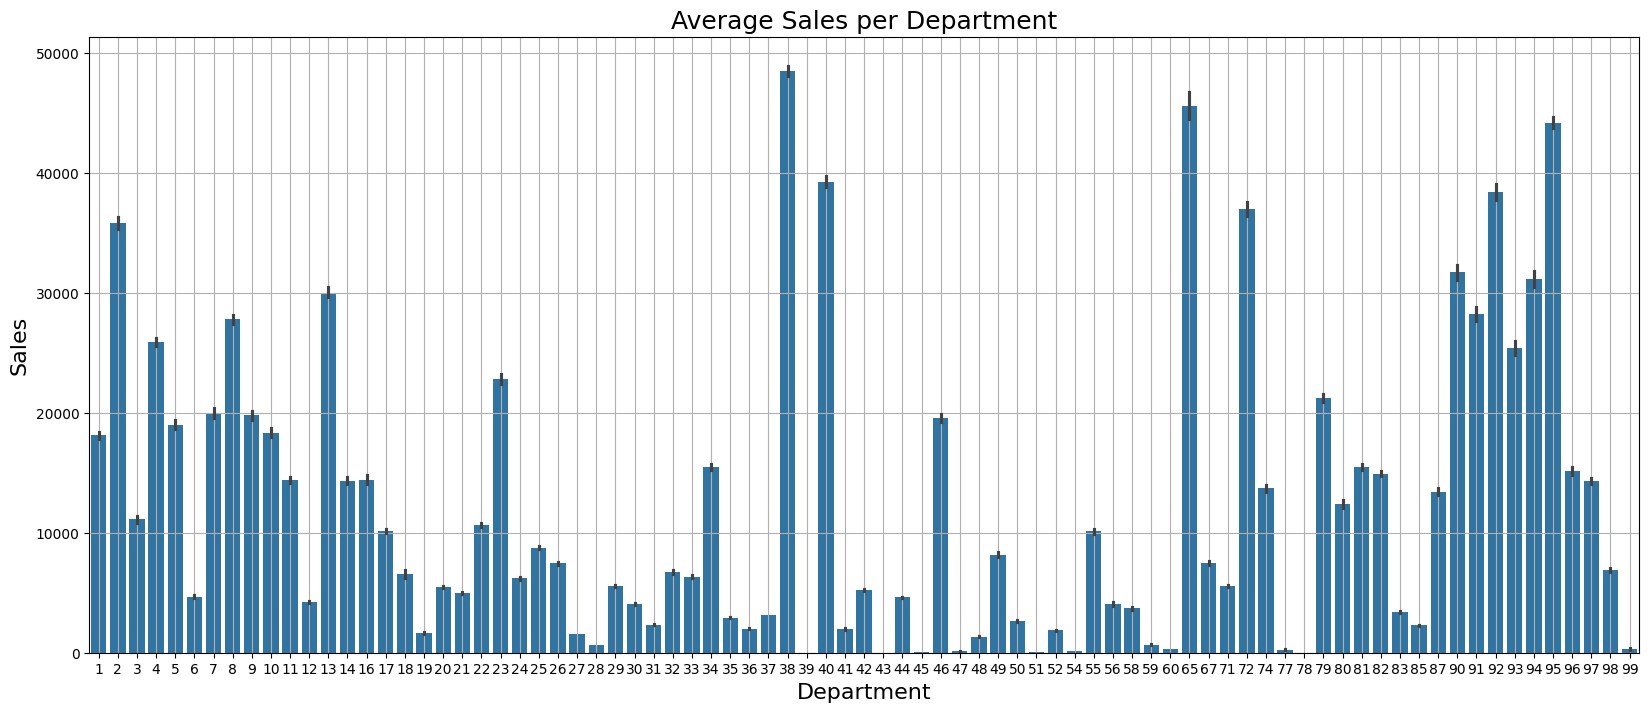

In [42]:
plt.figure(figsize=(20,8))
sns.barplot(x='Dept',y='Weekly_Sales',data=data)
plt.grid()
plt.title('Average Sales per Department', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Department', fontsize=16)
plt.show()

# Sales vs Temperature

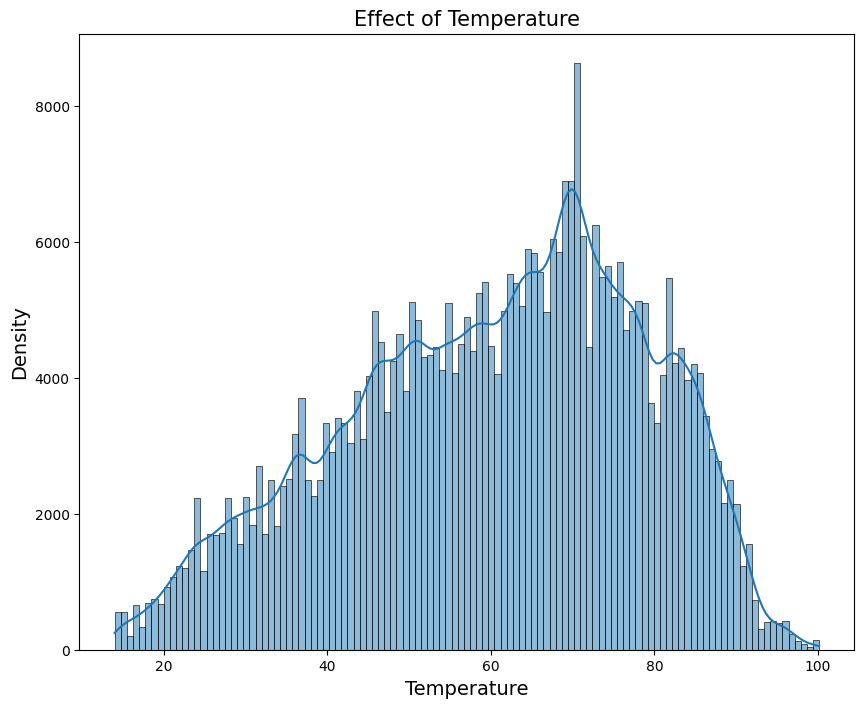

In [43]:
plt.figure(figsize=(10,8))
sns.histplot(data['Temperature'], kde=True)
plt.title('Effect of Temperature', fontsize=15)
plt.xlabel('Temperature', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.show()

# Holiday Distribution

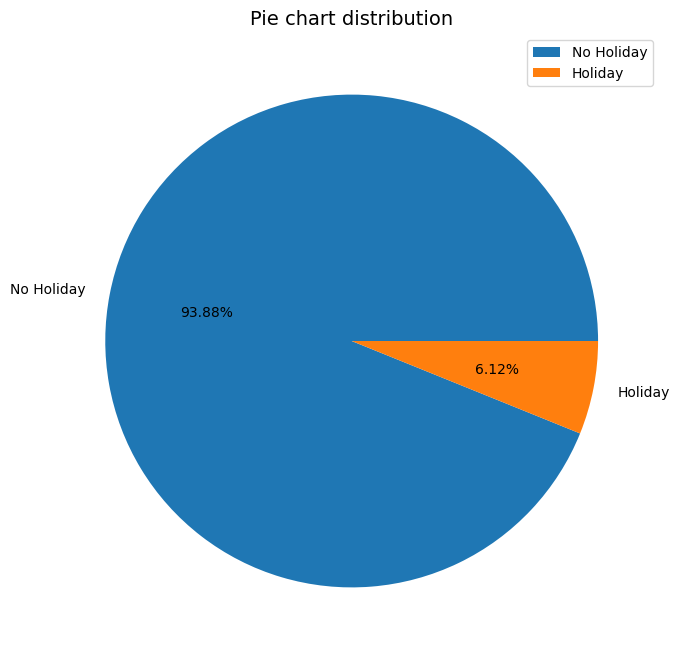

In [44]:
plt.figure(figsize=(8,8))
plt.pie(data['IsHoliday'].value_counts(),labels=['No Holiday','Holiday'],autopct='%0.2f%%')
plt.title("Pie chart distribution",fontsize=14)
plt.legend()
plt.show()

# Time Series Decompse

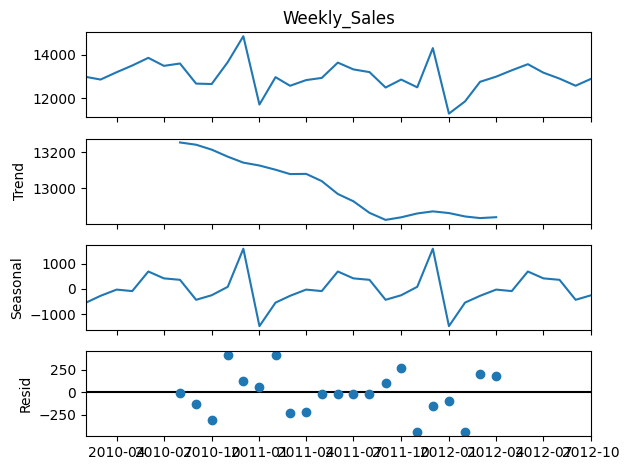

In [45]:
sm.tsa.seasonal_decompose(data['Weekly_Sales'].resample('MS').mean(), model='additive').plot()
plt.show()

# One-hot-encoding

In [46]:
cat_col = ['Store','Dept','Type']
data_cat = data[cat_col].copy()

In [47]:
data_cat.tail()

,Store,Dept,Type
Date,,,
2012-10-26,2,26,A
2012-10-26,38,23,C
2012-10-26,27,6,A
2012-10-26,36,40,A
2012-10-26,45,98,B


In [48]:
data_cat = pd.get_dummies(data_cat,columns=cat_col)

In [49]:
data_cat.head()

,Store_1,Store_2,Store_3,Store_4,Store_5,Store_6,Store_7,Store_8,Store_9,Store_10,...,Dept_93,Dept_94,Dept_95,Dept_96,Dept_97,Dept_98,Dept_99,Type_A,Type_B,Type_C
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-05,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2010-02-05,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,True,False,False,False,True,False
2010-02-05,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
2010-02-05,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
2010-02-05,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False


In [50]:
data.shape

(374247, 20)

In [51]:
data = pd.concat([data, data_cat], axis=1)

In [52]:
data.shape

(374247, 149)

In [53]:
data.drop(columns=cat_col,inplace=True)

In [54]:
data.drop(columns=['Date'], inplace=True)

In [55]:
data.shape

(374247, 145)

# Data Normalization

In [56]:
num_col = ['Weekly_Sales','Size','Temperature','Fuel_Price','CPI','Unemployment','Total_MarkDown','max','min','mean','median','std']

In [57]:
minmax_scale = MinMaxScaler(feature_range=(0, 1))
def normalization(df,col):
  for i in col:
    arr = df[i]
    arr = np.array(arr)
    df[i] = minmax_scale.fit_transform(arr.reshape(len(arr),1))
  return df

In [58]:
data.head()

,Weekly_Sales,Size,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Year,Month,Week,...,Dept_93,Dept_94,Dept_95,Dept_96,Dept_97,Dept_98,Dept_99,Type_A,Type_B,Type_C
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-05,24924.50,151315,42.31,2.572,211.096358,8.106,0,2010,2,5,...,False,False,False,False,False,False,False,True,False,False
2010-02-05,668.48,125833,38.01,2.572,214.655459,6.415,0,2010,2,5,...,False,False,False,False,True,False,False,False,True,False
2010-02-05,693.87,125833,38.01,2.572,214.655459,6.415,0,2010,2,5,...,False,False,False,False,False,False,False,False,True,False
2010-02-05,8654.60,155078,34.14,2.572,214.471451,6.299,0,2010,2,5,...,False,False,False,False,False,False,False,True,False,False
2010-02-05,11123.56,125833,38.01,2.572,214.655459,6.415,0,2010,2,5,...,False,False,False,False,False,False,False,False,True,False


In [59]:
data = normalization(data.copy(),num_col)

In [60]:
data.head()

,Weekly_Sales,Size,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Year,Month,Week,...,Dept_93,Dept_94,Dept_95,Dept_96,Dept_97,Dept_98,Dept_99,Type_A,Type_B,Type_C
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-05,0.342576,0.630267,0.328495,0.0501,0.840500,0.508787,0,2010,2,5,...,False,False,False,False,False,False,False,True,False,False
2010-02-05,0.009188,0.492338,0.278565,0.0501,0.875680,0.305248,0,2010,2,5,...,False,False,False,False,True,False,False,False,True,False
2010-02-05,0.009537,0.492338,0.278565,0.0501,0.875680,0.305248,0,2010,2,5,...,False,False,False,False,False,False,False,False,True,False
2010-02-05,0.118953,0.650636,0.233627,0.0501,0.873861,0.291286,0,2010,2,5,...,False,False,False,False,False,False,False,True,False,False
2010-02-05,0.152888,0.492338,0.278565,0.0501,0.875680,0.305248,0,2010,2,5,...,False,False,False,False,False,False,False,False,True,False


# Correlation between features of dataset

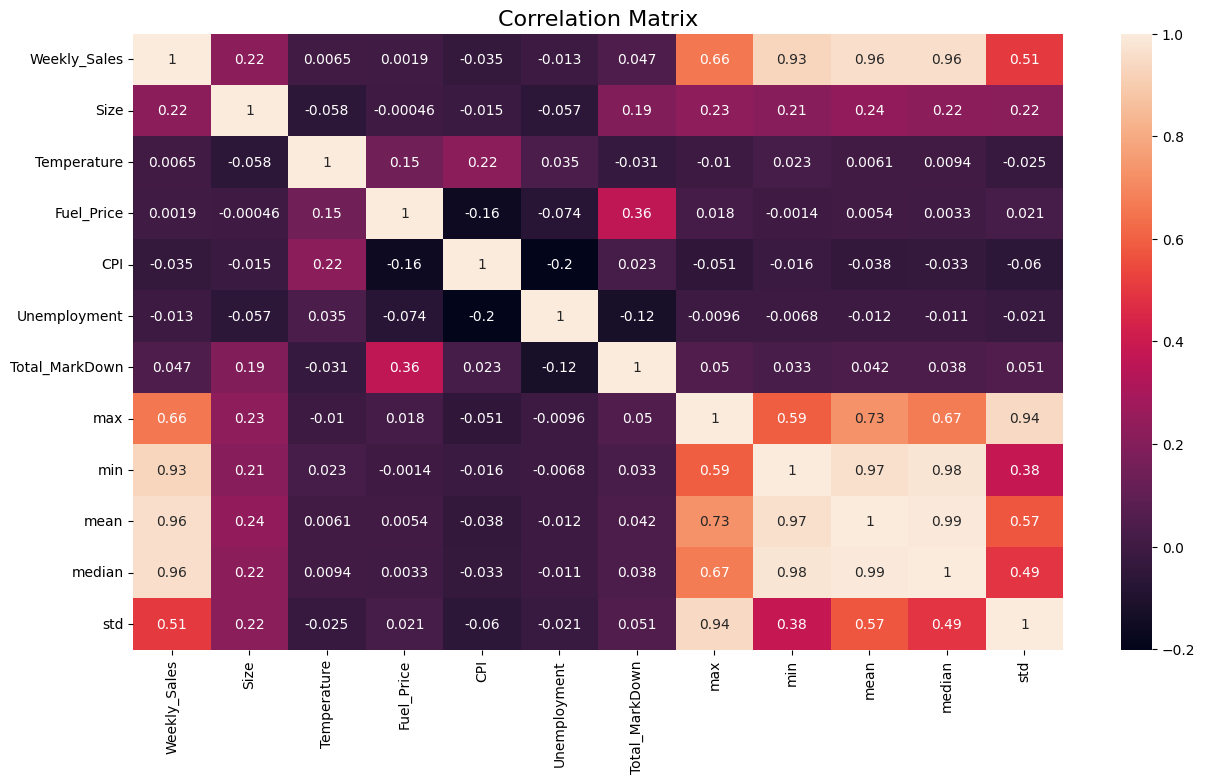

In [61]:
plt.figure(figsize=(15,8))
corr = data[num_col].corr()
sns.heatmap(corr,vmax=1.0,annot=True)
plt.title('Correlation Matrix', fontsize=16)
plt.show()

# Recursive Feature Elimination

In [62]:
feature_col = data.columns.difference(['Weekly_Sales'])
feature_col

Index(['CPI', 'Dept_1', 'Dept_10', 'Dept_11', 'Dept_12', 'Dept_13', 'Dept_14',
       'Dept_16', 'Dept_17', 'Dept_18',
       ...
       'Type_B', 'Type_C', 'Unemployment', 'Week', 'Year', 'max', 'mean',
       'median', 'min', 'std'],
      dtype='object', length=144)

In [63]:
radm_clf = RandomForestRegressor(oob_score=True, n_estimators=50)
radm_clf.fit(data[feature_col], data['Weekly_Sales'])

RandomForestRegressor(n_estimators=50, oob_score=True)

In [64]:
pkl_filename = "./model/feature_elim_regressor.pkl"
if (not path.isfile(pkl_filename)):
  # saving the trained model to disk 
  with open(pkl_filename, 'wb') as file:
    pickle.dump(radm_clf, file)
  print("Model Saved")
else:
  print("Model already saved")

Model already saved


In [65]:
indices = np.argsort(radm_clf.feature_importances_)[::-1]
feature_rank = pd.DataFrame(columns = ['rank', 'feature', 'importance'])

for f in range(data[feature_col].shape[1]):
    feature_rank.loc[f] = [f+1,
                           data[feature_col].columns[indices[f]],
                           radm_clf.feature_importances_[indices[f]]]

feature_rank

,rank,feature,importance
0,1,median,4.794279e-01
1,2,mean,4.486289e-01
2,3,Week,1.966331e-02
3,4,Temperature,8.942652e-03
4,5,max,5.995774e-03
...,...,...,...
139,140,Dept_51,2.525084e-10
140,141,Dept_45,1.578948e-10
141,142,Dept_78,3.815859e-12
142,143,Dept_39,1.154559e-14


In [66]:
x=feature_rank.loc[0:22,['feature']]
x=x['feature'].tolist()
print(x)

['median', 'mean', 'Week', 'Temperature', 'max', 'CPI', 'Fuel_Price', 'min', 'Unemployment', 'std', 'Month', 'Total_MarkDown', 'Dept_16', 'Dept_18', 'IsHoliday', 'Dept_3', 'Size', 'Dept_1', 'Dept_9', 'Year', 'Dept_11', 'Dept_5', 'Dept_56']


In [67]:
X = data[x]
Y = data['Weekly_Sales']

In [68]:
data = pd.concat([X,Y],axis=1)

# Final Data

In [69]:
data

,median,mean,Week,Temperature,max,CPI,Fuel_Price,min,Unemployment,std,...,IsHoliday,Dept_3,Size,Dept_1,Dept_9,Year,Dept_11,Dept_5,Dept_56,Weekly_Sales
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-05,0.173215,0.208157,5,0.328495,0.088635,0.840500,0.050100,0.253530,0.508787,0.138276,...,0,False,0.630267,True,False,2010,False,False,False,0.342576
2010-02-05,0.004767,0.004499,5,0.278565,0.001180,0.875680,0.050100,0.064648,0.305248,0.004083,...,0,False,0.492338,False,False,2010,False,False,False,0.009188
2010-02-05,0.008968,0.009135,5,0.278565,0.003866,0.875680,0.050100,0.066212,0.305248,0.004314,...,0,False,0.492338,False,False,2010,False,False,False,0.009537
2010-02-05,0.086290,0.085594,5,0.233627,0.018453,0.873861,0.050100,0.161046,0.291286,0.010611,...,0,False,0.650636,False,False,2010,False,False,False,0.118953
2010-02-05,0.071542,0.080242,5,0.278565,0.044887,0.875680,0.050100,0.126993,0.305248,0.054362,...,0,False,0.492338,False,False,2010,False,False,False,0.152888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-10-26,0.082590,0.087055,43,0.647585,0.030286,0.958935,0.518036,0.119050,0.275758,0.039642,...,0,False,0.906277,False,False,2012,False,False,False,0.127259
2012-10-26,0.001617,0.001419,43,0.602996,0.000446,0.050698,0.916333,0.064822,0.760713,0.000478,...,0,False,0.026063,False,False,2012,False,False,False,0.000730
2012-10-26,0.064375,0.072181,43,0.522178,0.063107,0.165055,0.801102,0.097548,0.496028,0.072670,...,0,False,0.916437,False,False,2012,False,False,False,0.073391


Splitted into Train, Validation, Test

In [70]:
X = data.drop(['Weekly_Sales'], axis=1)
Y = data.Weekly_Sales

In [71]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.20, random_state=50)

# Linear Regression Model

In [72]:
lr = LinearRegression()
lr.fit(X_train, y_train)


LinearRegression()

In [73]:
lr_acc = lr.score(X_test,y_test)*100
print("Linear Regressor Accuracy - ",lr_acc)

Linear Regressor Accuracy -  92.28079698115758


In [74]:
y_pred = lr.predict(X_test)

In [75]:

print("Mean Absolute Error:" , metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:" , metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:" , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("Explained Variance Score:" , metrics.explained_variance_score(y_test, y_pred))

Mean Absolute Error: 0.03005771492151413
Mean Squared Error: 0.0034851431916206555
Root Mean Squared Error: 0.059035101351828434
Explained Variance Score: 0.9228079866096734


In [76]:
lr_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
lr_df.to_csv('./predicted data/linear_regression_pred.csv')
lr_df

,Actual,Predicted
Date,,
2011-08-05,0.161661,0.132555
2010-07-09,0.364278,0.280242
2011-07-01,0.005003,0.026085
2012-01-06,0.015856,0.015369
2011-08-26,0.000318,0.002072
...,...,...
2011-01-28,0.169068,0.236392
2010-08-20,0.252860,0.235591
2010-11-26,0.265617,0.321839


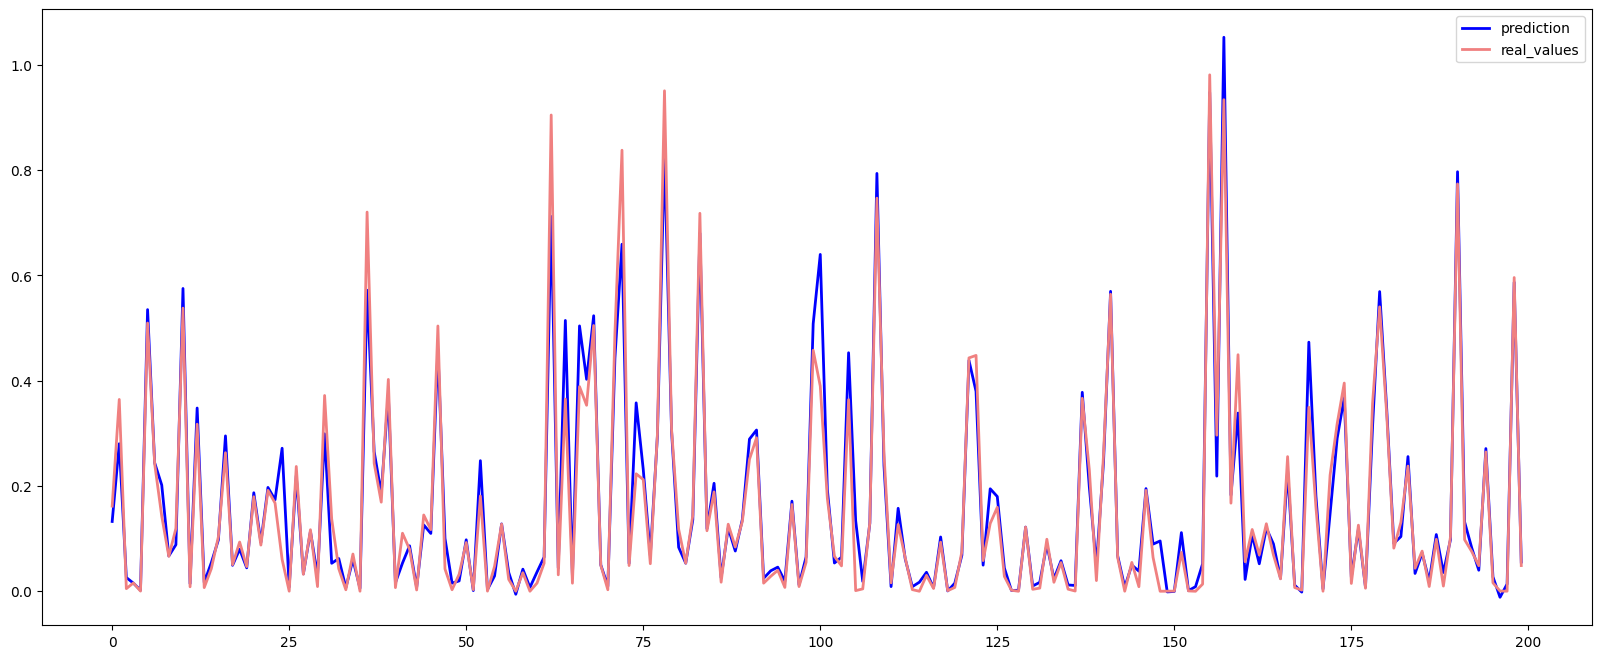

In [77]:
plt.figure(figsize=(20,8))
plt.plot(lr.predict(X_test[:200]), label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[:200].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.show()

In [78]:
pkl_filename = "./model/linear_regression.pkl"
if (not path.isfile(pkl_filename)):
  # saving the trained model to disk 
  with open(pkl_filename, 'wb') as file:
    pickle.dump(lr, file)
  print("Model Saved")
else:
  print("Model already saved")

Model already saved


# Random Forest Regressor Model

In [79]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [80]:
rf_acc = rf.score(X_test,y_test)*100
print("Random Forest Regressor Accuracy:",rf_acc)

Random Forest Regressor Accuracy: 97.88589763650928


In [81]:
y_pred = rf.predict(X_test)

In [82]:
print("Mean Absolute Error:" , metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:" , metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:" , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("Explained Variance Score:" , metrics.explained_variance_score(y_test, y_pred))

Mean Absolute Error: 0.015538133434796774
Mean Squared Error: 0.0009544961365213246
Root Mean Squared Error: 0.030894920885500332
Explained Variance Score: 0.9788593272133669


In [83]:


rf_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
rf_df.to_csv('./predicted data/randomforest_regressor_pred.csv')
rf_df

,Actual,Predicted
Date,,
2011-08-05,0.161661,0.125476
2010-07-09,0.364278,0.320310
2011-07-01,0.005003,0.014052
2012-01-06,0.015856,0.020471
2011-08-26,0.000318,0.000564
...,...,...
2011-01-28,0.169068,0.181351
2010-08-20,0.252860,0.263728
2010-11-26,0.265617,0.393614


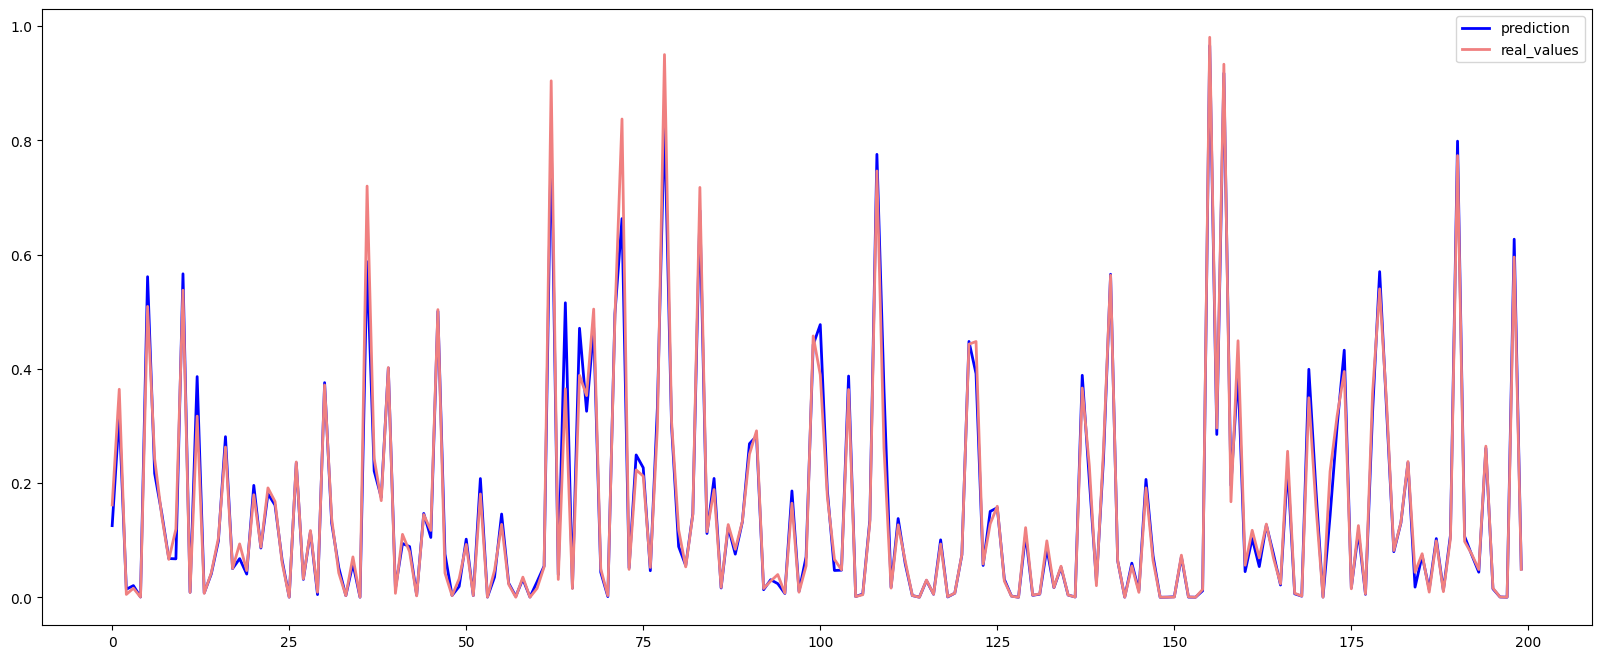

In [84]:

plt.figure(figsize=(20,8))
plt.plot(rf.predict(X_test[:200]), label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[:200].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.show()

In [85]:

pkl_filename = "./model/randomforest_regressor.pkl"
if (not path.isfile(pkl_filename)):
  # saving the trained model to disk 
  with open(pkl_filename, 'wb') as file:
    pickle.dump(rf, file)
  print("Model Saved")
else:
  print("Model already saved")

Model already saved


# KNN

In [86]:
knn = KNeighborsRegressor(n_neighbors = 5,weights = 'uniform')
knn.fit(X_train,y_train)

KNeighborsRegressor()

In [87]:
knn_acc = knn.score(X_test, y_test)*100
print("KNeigbhbors Regressor Accuracy:",knn_acc)

KNeigbhbors Regressor Accuracy: 92.73326665838559


In [88]:
y_pred = knn.predict(X_test)

In [89]:
print("Mean Absolute Error:" , metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:" , metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:" , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("Explained Variance Score:" , metrics.explained_variance_score(y_test, y_pred))

Mean Absolute Error: 0.031032616955932832
Mean Squared Error: 0.0032808576441157155
Root Mean Squared Error: 0.05727877132163115
Explained Variance Score: 0.9284879798497051


In [90]:

knn_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
knn_df.to_csv('./predicted data/knn_regressor_pred.csv')
knn_df

,Actual,Predicted
Date,,
2011-08-05,0.161661,0.126146
2010-07-09,0.364278,0.235068
2011-07-01,0.005003,0.053886
2012-01-06,0.015856,0.011596
2011-08-26,0.000318,0.000428
...,...,...
2011-01-28,0.169068,0.220247
2010-08-20,0.252860,0.236798
2010-11-26,0.265617,0.192371


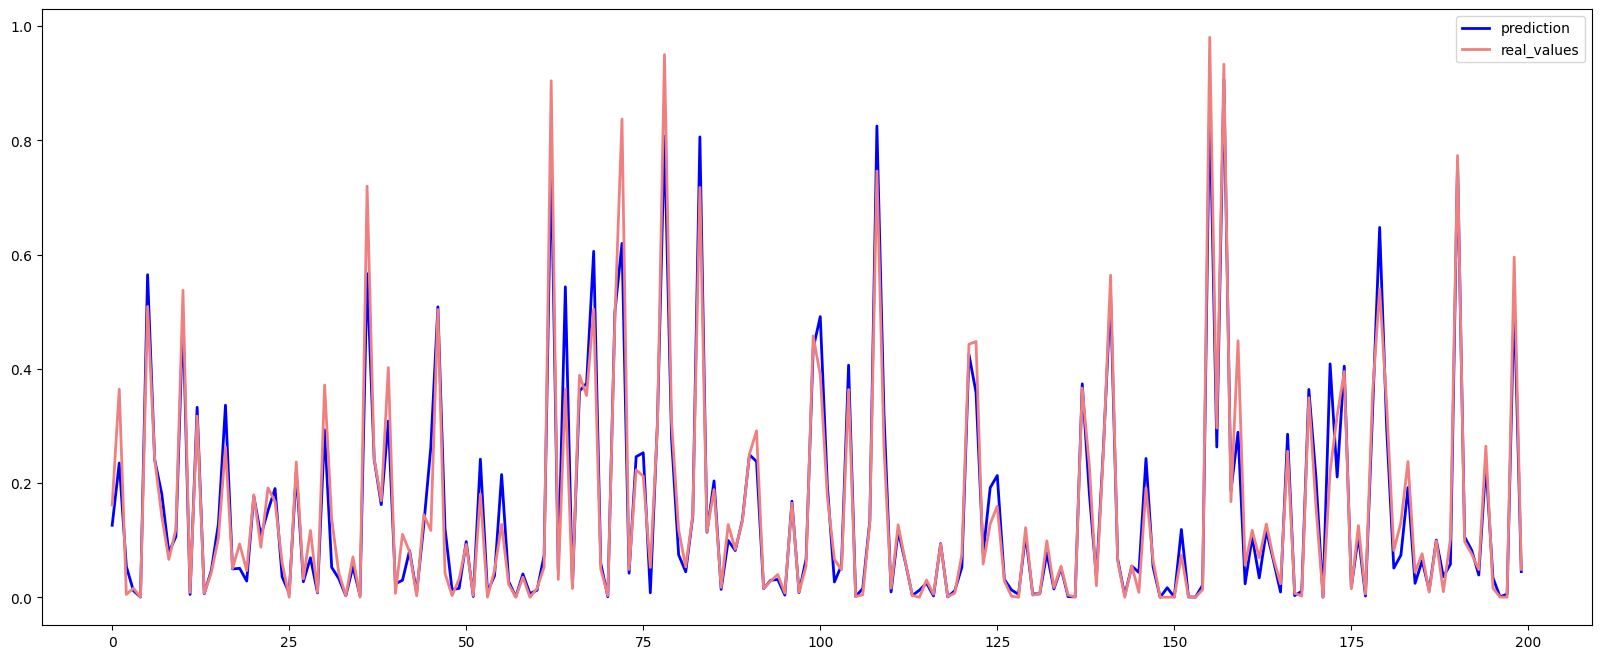

In [91]:
plt.figure(figsize=(20,8))
plt.plot(knn.predict(X_test[:200]), label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[:200].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.show()

In [92]:
pkl_filename = "./model/knn_regressor.pkl"
if (not path.isfile(pkl_filename)):
  # saving the trained model to disk 
  with open(pkl_filename, 'wb') as file:
    pickle.dump(knn, file)
  print("Model Saved")
else:
  print("Model already saved")

Model already saved


# XGboost

In [93]:
xgbr = XGBRegressor()
xgbr.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [94]:
xgb_acc = xgbr.score(X_test,y_test)*100
print("XGBoost Regressor Accuracy:",xgb_acc)

XGBoost Regressor Accuracy: 97.30147198787793


In [95]:
y_pred = xgbr.predict(X_test)

In [96]:
print("Mean Absolute Error:" , metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:" , metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:" , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("Explained Variance Score:" , metrics.explained_variance_score(y_test, y_pred))

Mean Absolute Error: 0.019802008992170973
Mean Squared Error: 0.0012183584893269447
Root Mean Squared Error: 0.03490499232669941
Explained Variance Score: 0.9730149924137432


In [97]:

xgb_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
xgb_df.to_csv('./predicted data/xgboost_pred.csv')
xgb_df

,Actual,Predicted
Date,,
2011-08-05,0.161661,0.128253
2010-07-09,0.364278,0.309000
2011-07-01,0.005003,0.018648
2012-01-06,0.015856,0.020477
2011-08-26,0.000318,0.000478
...,...,...
2011-01-28,0.169068,0.220189
2010-08-20,0.252860,0.244801
2010-11-26,0.265617,0.382784


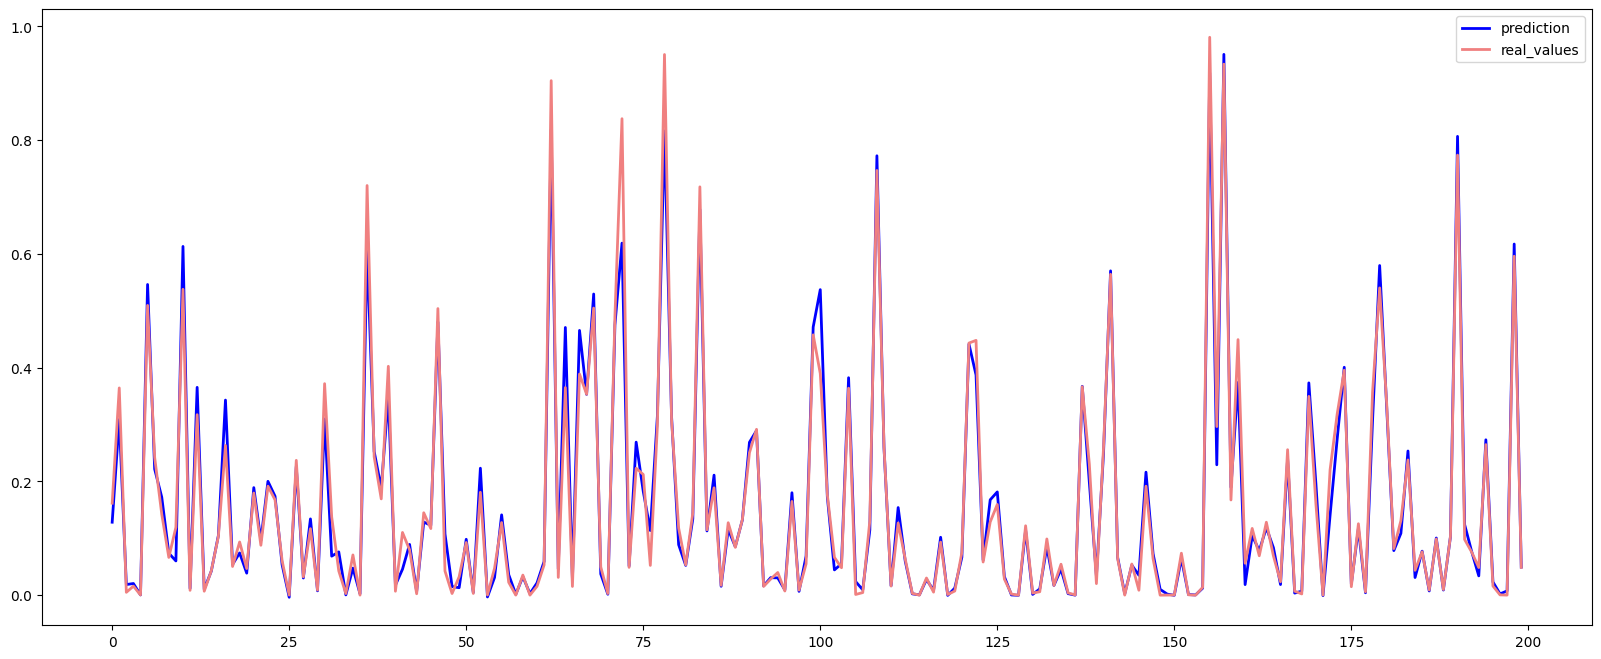

In [98]:

plt.figure(figsize=(20,8))
plt.plot(xgbr.predict(X_test[:200]), label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[:200].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.show()

In [99]:
pkl_filename = "./model/xgboost_regressor.pkl"
if (not path.isfile(pkl_filename)):
  # saving the trained model to disk 
  with open(pkl_filename, 'wb') as file:
    pickle.dump(xgbr, file)
  print("Model Saved")
else:
  print("Model already saved")

Model already saved


## Custom DNN

In [100]:
def create_model():
  model = Sequential()
  model.add(Dense(64, input_dim=X_train.shape[1], kernel_initializer='normal',activation='relu'))
  model.add(Dense(32, kernel_initializer='normal'))
  model.add(Dense(1, kernel_initializer='normal'))
  model.compile(loss='mean_absolute_error', optimizer='adam')
  return model

In [101]:
estimator_model = KerasRegressor(model=create_model, verbose=1)

In [102]:
history = estimator_model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=5000)

/Users/selva/miniforge3/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-06-07 18:23:36.523383: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3
2024-06-07 18:23:36.523499: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2024-06-07 18:23:36.523507: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2024-06-07 18:23:36.524069: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-06-07 18:23:36.524530: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created Ten

Epoch 1/100


2024-06-07 18:23:37.160678: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.1359 - val_loss: 0.1525
Epoch 2/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1905 - val_loss: 0.2013
Epoch 3/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2026 - val_loss: 0.1560
Epoch 4/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1942 - val_loss: 0.1443
Epoch 5/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1684 - val_loss: 0.1772
Epoch 6/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1732 - val_loss: 0.1940
Epoch 7/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1627 - val_loss: 0.1412
Epoch 8/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1488 - val_loss: 0.1566
Epoch 9/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1570 - val_loss: 0.1366
Epoch 10/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1507 - val_loss: 0.2064
Epoch 11/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1623 - val_loss: 0.1338
Epoch 12/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1458 - val_lo

In [103]:
dnn_acc = metrics.r2_score(y_pred, y_test)*100
print("Deep Neural Network accuracy:",dnn_acc)

Deep Neural Network accuracy: 97.19802320015222


In [104]:
y_pred = estimator_model.predict(X_test)

2340/2340 ━━━━━━━━━━━━━━━━━━━━ 2s 662us/step


In [105]:
print("Mean Absolute Error:" , metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:" , metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:" , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("Explained Variance Score:" , metrics.explained_variance_score(y_test, y_pred))

Mean Absolute Error: 0.05863234952143523
Mean Squared Error: 0.005591697005884597
Root Mean Squared Error: 0.07477765044372948
Explained Variance Score: 0.9105808993207436


In [106]:
dnn_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
dnn_df.to_csv('./predicted data/dnn_pred.csv')
dnn_df

,Actual,Predicted
Date,,
2011-08-05,0.161661,0.168236
2010-07-09,0.364278,0.323494
2011-07-01,0.005003,0.078657
2012-01-06,0.015856,0.065675
2011-08-26,0.000318,0.048923
...,...,...
2011-01-28,0.169068,0.268384
2010-08-20,0.252860,0.272183
2010-11-26,0.265617,0.373252


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


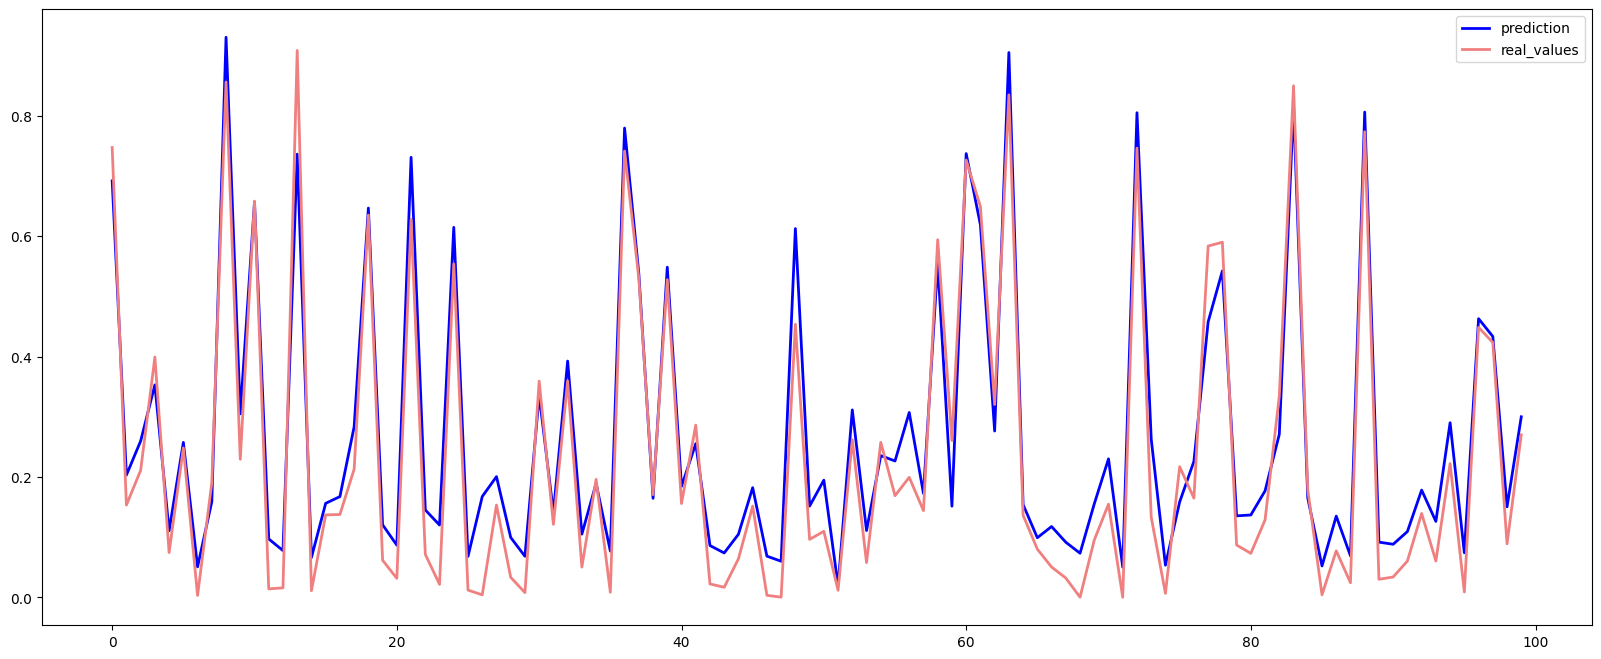

In [107]:
plt.figure(figsize=(20,8))
plt.plot(estimator_model.predict(X_test[200:300]), label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[200:300].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")

## Model comparison

In [108]:
acc = {'model':['lr_acc','rf_acc','knn_acc','xgb_acc','dnn_acc'],'accuracy':[lr_acc,rf_acc,knn_acc,xgb_acc,dnn_acc]}

In [109]:
acc_df = pd.DataFrame(acc)
acc_df

,model,accuracy
0,lr_acc,92.280797
1,rf_acc,97.885898
2,knn_acc,92.733267
3,xgb_acc,97.301472
4,dnn_acc,97.198023


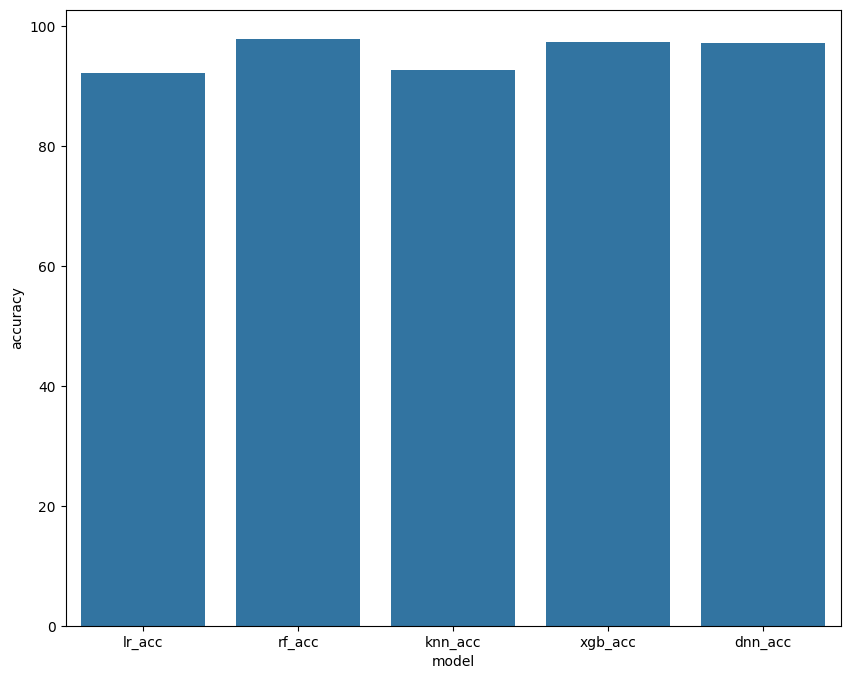

In [110]:
plt.figure(figsize=(10,8))
sns.barplot(x='model',y='accuracy',data=acc_df)
plt.show()